# Homework Assignment 4

#### Due: Friday April 6th, 11:59pm.

Save your file in **mp248/Assignment.4/Assignment.4.ipynb** on your Bitbucket repository.


#### Problem 1:

For this problem, we ask you to consider the single pendulum and double pendulums with friction, from *Dynamic.plots.1.ipynb* and *Dynamic.plots.2.ipynb*.   

(a) In *Dynamic.plots.1.ipynb* the single pendulum differential equation had the two system constants, $a \geq 0$ is what we called the *friction constant*, and $b > 0$ is the *mass/gravity constant*.  The differential equation had the form $\theta'' + a \theta' + b \sin \theta = 0$.   The *total energy* of the system is

$$E_{tot} = (\theta')^2 + 2b -2b\cos\theta$$

For the simulation to be accurate, the total energy of the system should dissipate according to the heat loss through friction. Thus we should have equality

$$\frac{dE}{dt} = -2a(\theta')^2$$

We call the right hand side of this equation the *theoretical power loss of the system*. If $E(t_i)$ represents the actual total energy of the system at time $t_i$, then the *actual power loss between frames* $t_i$ and $t_{i+1}$ would be the quantity $\frac{E(t_{i+1})-E(t_i)}{t_{i+1} - t_i} = \frac{\Delta E}{\Delta t}$. 

For the system with $a=0.1$, $b=1$, $\theta_0 = 0$ and $\theta'_0=10$, create a plot with one slider controlling the time step.  In your plot, show $\theta(t)$ as a function of time. In a text field (in the plot) present the maximum (absolute value) of the difference between the theoretical $-2a(\theta')^2$ power and the actual power loss $\frac{\Delta E}{\Delta t}$ between frames of the animation.  Call this quantity the power-loss-deviation (PLD) of the simulation, i.e. in your plot you should have a text field "MAX PLD: number". 

Ensure your time interval is long enough so that one can see the pendulum coming to rest (let's define this to be $E_{tot}(t_i) < 0.1$) for $t_i$ at the end of your interval.  

(b) Determine the how small $\Delta t$ needs to be to ensure the maximum PLD is less than *1.0*.

(c) A properly simulated solution to this differential equation has a horizontal asymptote an integer multiple of $2\pi$.  How small does $\Delta t$ need to be to discover the correct asymptote, and what is the asymptote?


<IPython.core.display.Javascript object>


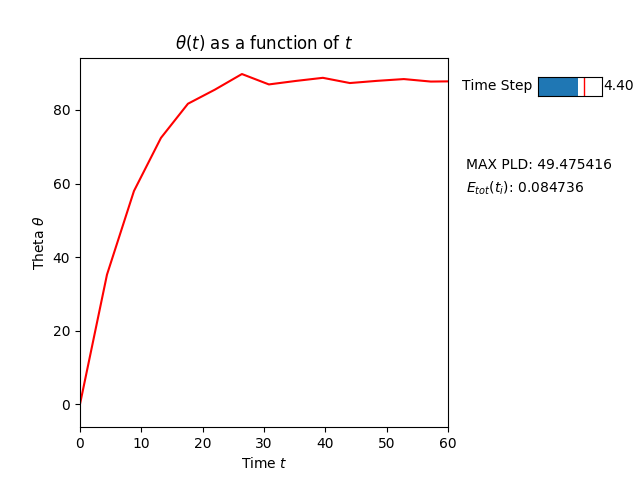

In [1]:
# 1(a)
# Plot theta(t) as a function of time
# Theoretical power loss: dE/dt = -2*a(theta')**2
# Actual power loss: [E(ti+1)-E(ti)]/[ti+1 - ti] = del_E/del_t

##matplotlib notebook
%matplotlib nbagg  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from scipy.integrate import odeint
from matplotlib.widgets import Slider

plt.close()

fig,ax = plt.subplots()
plt.subplots_adjust(right=0.7)

a = 0.1         # a: friction constant
b = 1.0         # b: mass/gravity constant
th_0 = 0.0      # th_0: theta at time 0
tp_0 = 10.0     # thp_0: theta prime at time 0
T = 60.0        # T: max time
h = 5.10        # h: time step
th = [th_0]     # th: theta
tp = [tp_0]     # thp: theta prime
t = [0.0]       # t: time
h_max = 30.0    # h_max: y-axis max radians
h_min = -2.0    # h_min: y-axis min radians
pos_text = ((h_max - h_min)/2)*4  # pos_text: positions of the textboxes

def solve_eqn1(T, h, th, tp, a, b):
    t = np.arange(0.0, T+h, h)
    SOL = odeint(lambda th, t, a, b: 
                 [th[1], -a*th[1]-b*np.sin(th[0])], [th[0], tp[0]], t, args=(a,b))
    
    th = np.asarray([x[0] for x in SOL])
    tp = np.asarray([x[1] for x in SOL])
    E = tp**2 + 2*b - 2*b*np.cos(th)
    P_theo = -2*a*tp**2
    P_acc = np.asarray([E[i+1] - E[i] for i in range(0, len(E)-1)])
    pld = P_theo[1:-1] - P_acc[0:-1]
    return(t, th, pld, E)

l, = plt.plot(t, th, 'r')
pld_text = plt.text(T*1.05, pos_text, 'PLD: ')
etot_text = plt.text(T*1.05, pos_text*0.9, '$E_{tot}(t_i)$: ')
ax.set_title('$\\theta(t)$ as a function of $t$')
ax.set_xlabel('Time $t$')
ax.set_ylabel('Theta $\\theta$')
ax.set_xlim(left=0.0, right=T)
ax.set_ylim(bottom=h_min*np.pi, top=h_max*np.pi)
axh = plt.axes([0.84, 0.8, 0.1, 0.04])
hval = Slider(axh, 'Time Step ', 0.0, 7.0, valinit=h)

th = [th_0]
tp = [tp_0]
h = hval.val

t, th, pld, E = solve_eqn1(T, h, th, tp, a, b)
    
## update screen
pld_text.set_text("MAX PLD: %6.6f" % max(pld))
etot_text.set_text("$E_{tot}(t_i)$: %6.6f" % E[-1])
l.set_xdata(t)
l.set_ydata(th)
fig.canvas.draw_idle()

def update(val):
    th = [th_0]
    tp = [tp_0]
    h = hval.val
    t, th, pld, E = solve_eqn1(T, h, th, tp, a, b)

    ## update screen
    pld_text.set_text("MAX PLD: %6.6f" % max(pld))
    etot_text.set_text("$E_{tot}(t_i)$: %6.6f" % E[-1])
    l.set_xdata(t)
    l.set_ydata(th)
    fig.canvas.draw_idle()

hval.on_changed(update)

plt.show()

In [ ]:
#1(b)
# delta t must be less than 5.10

In [ ]:
#1(c)
# Can tell at any time step as long as you zoom...
asym_approx = 88
asym = int(round(asym_approx/(2*np.pi), 0))
print(asym)
# So as t -> inf, theta -> 14*2*pi

#### Problem 2: 

We roughly repeat Problem 1, but for the double pendulum.  For this problem we ask you to extend the code from *Dynamic.plots.2.ipynb*.

(a) Make a plot of $\theta_1$ and $\theta_2$ vs. $t$ for the double pendulum with initial conditions 
$$ \theta_1(0) = \pi \hskip 1cm \theta_2(0) = 0$$
$$ \theta_1'(0) = 0 \hskip 1cm \theta_2'(0) = 10$$
$$m_1 = 1 \hskip 1cm m_2 = 1$$
$$r_1 = 1 \hskip 1cm r_2 = 1$$
$$k_1 \ 0.1 \hskip 1cm k_2 = 0.1$$
$$ g = 10$$

Have a slider that controls the number of steps in the numerical integration.   Have your plot run long-enough so that the asymptotic behaviour of $\theta_1$ and $\theta_2$ is apparent, in particular both trend towards integer multiples of $2 \pi$.

(b) How small does $\Delta t$ need to be to see this asymptotic behaviour reliably, and what are the integer multiples for $\theta_1$ and $\theta_2$ respectively? 


In [2]:
# 2(a)

%matplotlib nbagg  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from scipy.integrate import odeint
from matplotlib.widgets import Slider
import sympy as sp
from sympy.utilities.autowrap import ufuncify


m1, m2, k1, k2, r1, r2, g, t = sp.symbols("m_1 m_2 k_1 k_2 r_1 r_2 g t")
## theta_i we give symbol ti
t1 = sp.Function("θ_1")(t)
t2 = sp.Function("θ_2")(t)
w1 = sp.Derivative(t1, t)
w2 = sp.Derivative(t2, t)

ti = sp.Function("θ_i")(t)
wi = sp.Derivative(ti, t)

# R is the Rayleigh Dispersion
R = sp.Function("R")
# L is the Lagrangian
L = sp.Function("L")
# T is kinetic energy, V is potential energy
T, V = sp.symbols("T V")

Teq = sp.Eq(T, (1/2)*m1*r1**2*w1**2 + \
            m2*r1*r2*w1*w2*sp.cos(t1-t2)+ \
            (1/2)*m2*r1**2*w1**2+ \
            (1/2)*m2*r2**2*w2**2)
Veq = sp.Eq(V, -m1*g*r1*sp.cos(t1) - \
            m2*g*(r1*sp.cos(t1)+r2*sp.cos(t2)))
Leq = sp.Eq(L, Teq.args[1] - Veq.args[1])
Req = sp.Eq(R, (1/2)*k1*w1**2 + (1/2)*k2*(w2-w1)**2)

LEM1 = (-sp.Derivative(Leq.args[1], t1) +\
        sp.Derivative(Req.args[1], w1) + sp.Derivative(Leq.args[1], w1, t)).doit().simplify()
LEM2 = (-sp.Derivative(Leq.args[1], t2) +\
        sp.Derivative(Req.args[1], w2) + sp.Derivative(Leq.args[1], w2, t)).doit().simplify()

## solve for theta_1'' and theta_2''
SOL = sp.solve((LEM1, LEM2), sp.Derivative(t1, t, 2), sp.Derivative(t2, t, 2))

T1pp = SOL[sp.Derivative(t1,t,2)].simplify()
T2pp = SOL[sp.Derivative(t2,t,2)].simplify()


w1, w2, t1, t2 = sp.symbols("w_1 w_2 t_1 t_2")

xT1pp = T1pp
xT1pp = xT1pp.xreplace({sp.Derivative(sp.Function("θ_1")(t), t): w1, \
                        sp.Derivative(sp.Function("θ_2")(t), t): w2, \
                        sp.Function("θ_1")(t): t1, \
                        sp.Function("θ_2")(t): t2})
xT2pp = T2pp
xT2pp = xT2pp.xreplace({sp.Derivative(sp.Function("θ_1")(t), t): w1, \
                        sp.Derivative(sp.Function("θ_2")(t), t): w2, \
                        sp.Function("θ_1")(t): t1, \
                        sp.Function("θ_2")(t): t2})


t1pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT1pp)
t2pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT2pp)

def theODE(TH, t, r1, r2, m1, m2, k1, k2, g):
    ## TH = (theta1, theta2, theta1', theta2')
    return [TH[2], TH[3], \
            t1pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g), \
            t2pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g)]


<IPython.core.display.Javascript object>


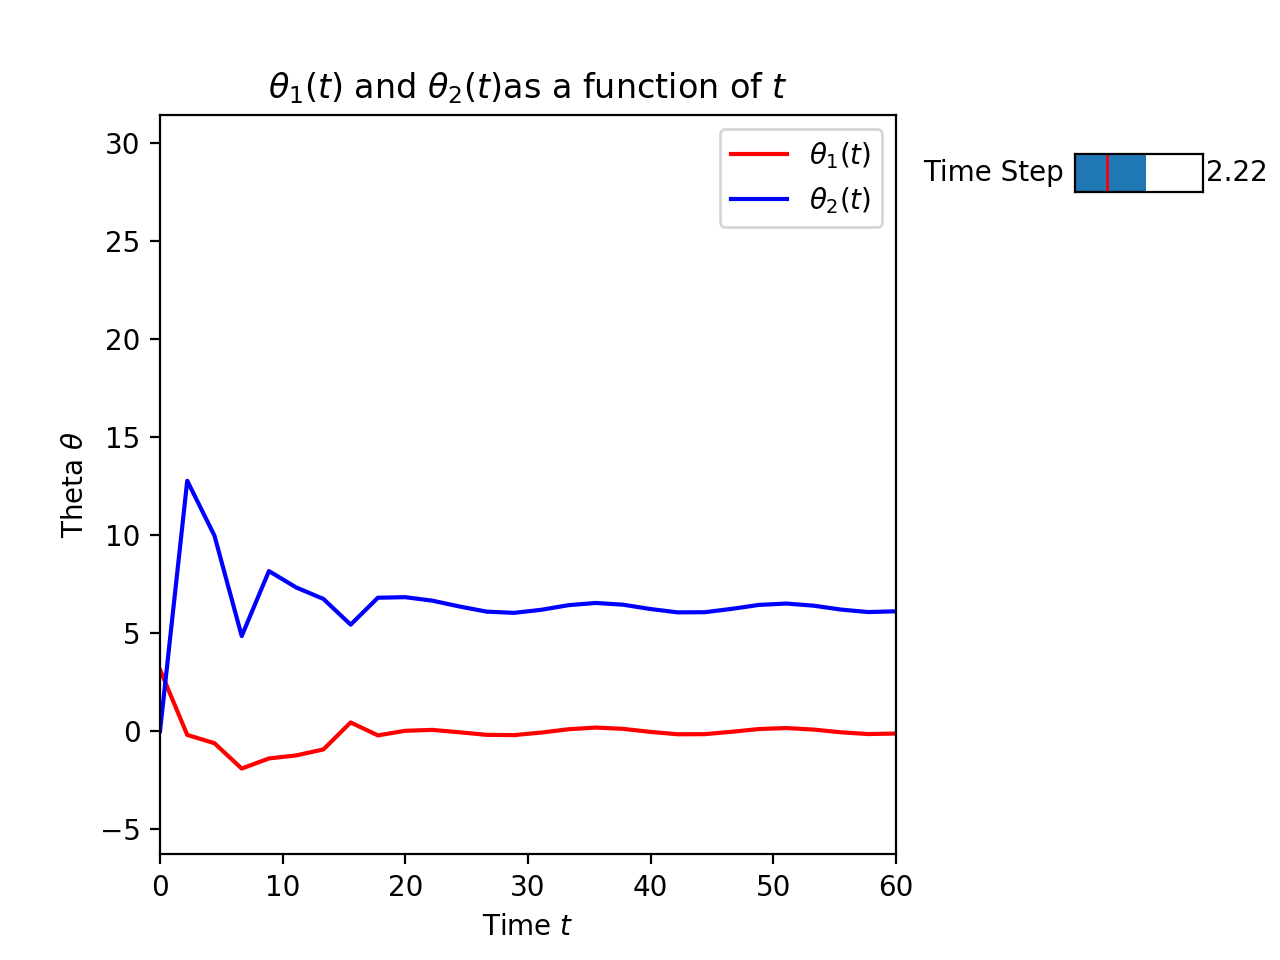

In [55]:
plt.close()
fig,ax = plt.subplots()
plt.subplots_adjust(right=0.7)

# Setting up variables
T = 60.0        # T: max time
h = 1.0         # h: time step
t1_0 = np.pi    # t1_0: initial theta1
t2_0 = 0.0      # t2_0: initial theta2
t1p_0 = 0.0     # t1p_0: initial theta1'
t2p_0 = 10.0    # t2p_0: initial theta2'
m1=m2=1.0       # m1, m2: mass of pendulum arms
r1=r2=1.0       # r1, r2: length of pendulum arms
k1=k2=0.1       # k1, k2: friction coefficient at bearings
g=10.0          # g: gravitational constant
h_max = 10.0    # h_max: y-axis max radians
h_min = -2.0    # h_min: y-axis min radians

TH = [t1_0, t2_0, t1p_0, t2p_0]
coeffs = (r1, r2, m1, m2, k1, k2, g)

def solve_eqn2(T, h, TH, coeffs):
    t = np.arange(0.0, T+h, h)
    SOL = odeint(theODE, TH, t, args=(r1, r2, m1, m2, k1, k2, g))
    t1 = np.asarray([x[0] for x in SOL])
    t2 = np.asarray([x[1] for x in SOL])
    t1p = np.asarray([x[2] for x in SOL])
    t2p = np.asarray([x[3] for x in SOL])
    return(t, t1, t2, t1p, t2p)

t, t1, t2, t1p, t2p = solve_eqn2(T, h, TH, coeffs)
l1, = plt.plot(t, t1, 'r', label = "$\\theta_1(t)$")
l2, = plt.plot(t, t2, 'b', label = "$\\theta_2(t)$")
ax.set_title('$\\theta_1(t)$ and $\\theta_2(t)$as a function of $t$')
ax.set_xlabel('Time $t$')
ax.set_ylabel('Theta $\\theta$')
ax.set_xlim(left=0.0, right=T)
ax.set_ylim(bottom=h_min*np.pi, top=h_max*np.pi)
ax.legend()

axh = plt.axes([0.84, 0.8, 0.1, 0.04])
hval = Slider(axh, 'Time Step ', 0.0, 4.0, valinit=h)

def update(val):
    h = hval.val
    t, t1, t2, t1p, t2p = solve_eqn2(T, h, TH, coeffs)
    
    ## update screen
    l1.set_xdata(t)
    l1.set_ydata(t1)
    l2.set_xdata(t)
    l2.set_ydata(t2)
    fig.canvas.draw_idle()

hval.on_changed(update)

plt.show()


$\theta_1$ trends to $0\pi$ and $\theta_2$ trends to $2\pi$, provided $\Delta t < 40/3000$. 

#### Problem 3: 

We want to analyze and model the wave data from Lab 3 in Part I in more detail. Read the data as you did in Lab 3. The data has now changed because we are at a different date. Recall that each row contains a number of quantaties for each hour of each day over the past three weeks. Here we are interested in the distrubution of wind speeds and if and how they correlate with wave heights.

**3.1**

Read the data and make a histogram of the wind speed using $n = 10$ bins. Print a formatted statement specifying the mean of the wind speed distribution.

**3.2**

Normalize the data so that the integral of the histogram is unity. Fit the normalized wind speed distribution with a the probability density function of a standard normal distribution. Plot the normalized data and the probability density function.

**3.3**

Plot the wave height vs. wind speed. Using your own Pearson's r coefficient function determine that coefficient for the data sets wind speed and waveheight. A simply model may predict that once the wind starts increasing it may take a while for the wave height to follow. Modify your plot of wave height vs. wind speed so that it can apply an `hour_offset` so that you plot the wave height at `t + hour_offset` vs. windspeed at time `t` (remember that in the data file the latest measurements are in the top row and following rows go backward in time). 

**3.4**

Determine Pearson's r coefficient for `hour_offset` in the range `[0,10]`. Plot Pearson's r coefficient against `hour_offset`. Overplot a least-square fit of a $4^{th}$ order polynomial. Print a formatted sentence that states the value of the `hour_offset` for the maximum correlation between wave height vs. wind speed. (Do not read off the maximum, but use a an expression that will alway print the right off set no matter what the data set is. Remember it changes every day!).